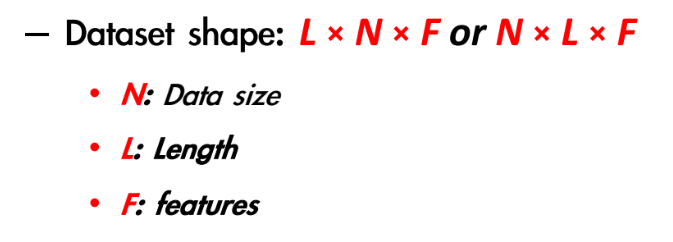

### in PyTorch, L x N x F is default

## Loading the bike-sharing data and change it into tensor

In [56]:
import os
import numpy as np
import torch

torch.set_printoptions(edgeitems=2, threshold=50, linewidth=75)

bikes_path = os.path.join(os.path.pardir, os.path.pardir, "_00_data", "e_time-series-bike-sharing-dataset", "hour-fixed.csv")

bikes_numpy = np.loadtxt(
  fname=bikes_path, dtype=np.float32, delimiter=",", skiprows=1,  # skiprows : 1st row = feature name
  converters={
    1: lambda x: float(x[8:10])  # 1: Column Index, 2011-01-07 --> 07 --> 7.0  (str -> float)
  }
)
bikes = torch.from_numpy(bikes_numpy)
print(bikes.shape)

torch.Size([17520, 17])


In [57]:
daily_bikes = bikes.view(-1, 24, bikes.shape[1]) # 2D -> 3D
print(daily_bikes.shape)  # >>> torch.Size([730, 24, 17]) , 730=17520/24

daily_bikes_data = daily_bikes[:, :, :-1]
daily_bikes_target = daily_bikes[:, :, -1].unsqueeze(dim=-1) # for same dimension

print(daily_bikes_data.shape)
print(daily_bikes_target.shape)
print(daily_bikes[:, :, -1].shape)

torch.Size([730, 24, 17])
torch.Size([730, 24, 16])
torch.Size([730, 24, 1])
torch.Size([730, 24])


In [58]:
first_day_data = daily_bikes_data[0]
print(first_day_data.shape)
print()

# Whether situation: 1: clear, 2:mist, 3: light rain/snow, 4: heavy rain/snow
print(first_day_data[:, 9].long())
eye_matrix = torch.eye(4)
print(eye_matrix)
print()

weather_onehot = eye_matrix[first_day_data[:, 9].long() - 1]
print(weather_onehot.shape)
print(weather_onehot)
print()

first_day_data_torch = torch.cat(tensors=(first_day_data, weather_onehot), dim=1)
print(first_day_data_torch.shape)
print(first_day_data_torch)

torch.Size([24, 16])

tensor([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 2, 2,
        2, 2])
tensor([[1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 0., 1.]])

torch.Size([24, 4])
tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        ...,
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]])

torch.Size([24, 20])
tensor([[ 1.,  1.,  ...,  0.,  0.],
        [ 2.,  1.,  ...,  0.,  0.],
        ...,
        [23.,  1.,  ...,  0.,  0.],
        [24.,  1.,  ...,  0.,  0.]])


In [59]:
a = [[[1,2,3],
      [4,5,6]],
     [[7,8,9],
      [10,11,2]]]
len(a)

2

## One-hot Encoding

In [60]:
day_data_torch_list = []

for daily_idx in range(daily_bikes_data.shape[0]):  # range(730)
  day = daily_bikes_data[daily_idx]  # day.shape: [24, 16]
  weather_onehot = eye_matrix[day[:, 9].long() - 1]
  day_data_torch = torch.cat(tensors=(day, weather_onehot), dim=1)  # day_data_torch.shape: [24, 20]
  day_data_torch_list.append(day_data_torch)

print(len(day_data_torch_list))
daily_bikes_data = torch.stack(day_data_torch_list, dim=0) # list -> tensor
print(daily_bikes_data.shape)

730
torch.Size([730, 24, 20])


## Delete instance, weather column and Normalizing

In [61]:
print(daily_bikes_data[:, :, 1:9].shape, daily_bikes_data[:, :, 10:].shape)
daily_bikes_data = torch.cat(
  [daily_bikes_data[:, :, 1:9], daily_bikes_data[:, :, 10:]], dim=2
) # Drop 'instant' and 'whethersit' columns
print(daily_bikes_data.shape)

temperatures = daily_bikes_data[:, :, 8]
daily_bikes_data[:, :, 8] = (daily_bikes_data[:, :, 8] - torch.mean(temperatures)) / torch.std(temperatures)

torch.Size([730, 24, 8]) torch.Size([730, 24, 10])
torch.Size([730, 24, 18])
